In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 제출 방법
1. 파일 이름에서 '이름'을 자신의 이름으로 고치시오.
1. 제출 후 삭제하시오.


In [2]:
!pip install selenium chromedriver_autoinstaller

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


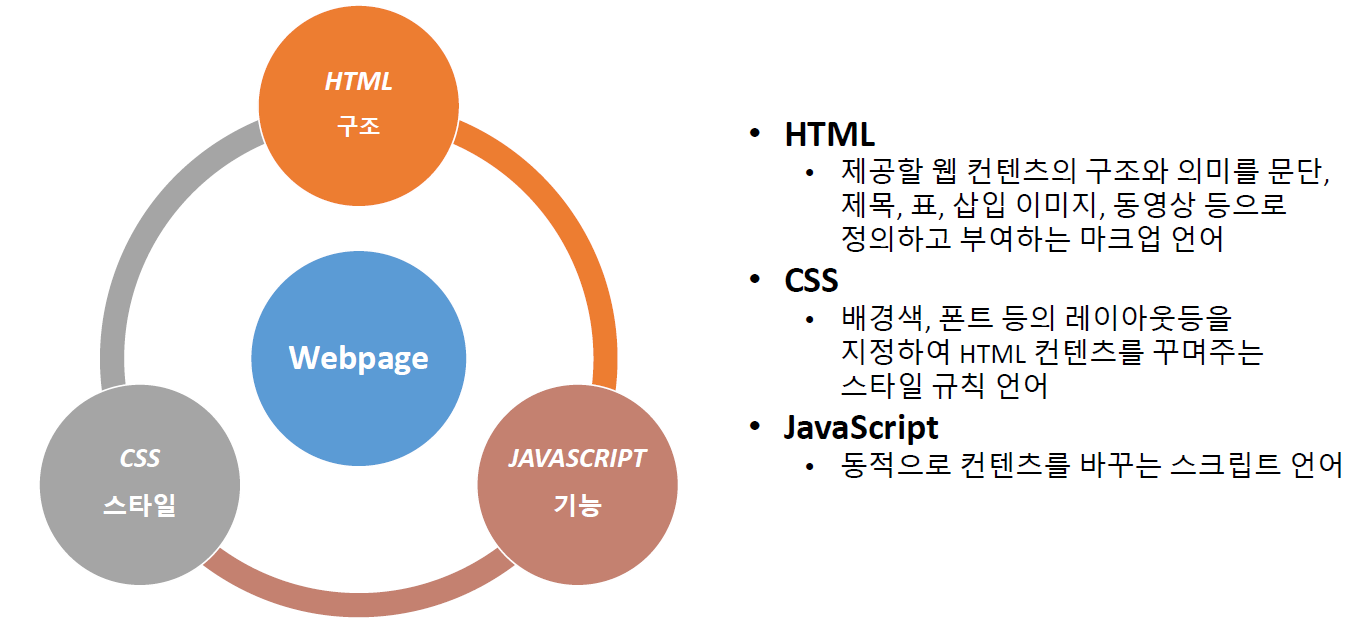

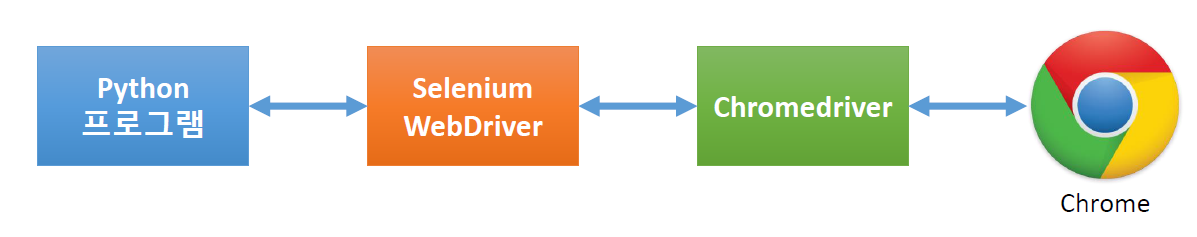

# 문제1

셀레니움을 이용하여 네이버에서 `고양이`를 검색하고, 고양이에 대한 설명을 추출하여 출력하시오.

***결과***
```
식육목(食肉目) 고양이과의 포유류에 속하며, 반려묘 또는 고양이과의 총칭. 한자로는 묘(猫)라 하고, 수고양이를 낭묘(郎猫), 암고양이를 여묘(女猫), 얼룩고양이를 표화묘(豹花猫), 들고양이를 야묘(野猫)로 부르기도 한다. 현재 집에서 기르고 있는 모든 애완용 고양이는 아프리카·남유럽·인도에 걸쳐 분포하는 리비아고양이(Felis si...
```

In [5]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()
import time

driver = webdriver.Chrome() # 크롬드라이버 생성
driver.get("https://www.naver.com") # 사이트 접속
time.sleep(3) # 로딩 시간 기다림

elem_query = driver.find_element(By.CSS_SELECTOR, "#query") # 검색 입력 태그 찾기
elem_query.send_keys('고양이') # 고양이 입력

elem_go = driver.find_element(By.CSS_SELECTOR, "#search-btn") # 검색 버튼 태그 찾기
elem_go.click() #  검색 버튼 클릭
time.sleep(3)

desc = driver.find_element(By.CSS_SELECTOR, ".desc._text").text # 고양이에 대한 설명 추출
                                            # 클래스가 2개라서 .을 2개 찍어준다. 그리고 공백을 없애준다
print(desc)

식육목(食肉目) 고양이과의 포유류에 속하며, 반려묘 또는 고양이과의 총칭. 한자로는 묘(猫)라 하고, 수고양이를 낭묘(郎猫), 암고양이를 여묘(女猫), 얼룩고양이를 표화묘(豹花猫), 들고양이를 야묘(野猫)로 부르기도 한다. 현재 집에서 기르고 있는 모든 애완용 고양이는 아프리카·남유럽·인도에 걸쳐 분포하는 리비아고양이(Felis si...


# 문제2

셀레니움을 이용하여 구글 이미지 검색을 하고, 이미지를 3장 저장하는 함수를 작성하시오.

저장한 디렉토리는 현재 디렉토리 아래의 imgs/ 밑에 검색키워드와 같은 이름의 디렉토리이다.

- 파라미터:
    - name: 사진검색 키워드
- 리턴: 없음

***결과***
```
BTS뷔:https://dimg.donga.com/wps/NEWS/IMAGE/2021/10/15/109721119.2.jpg
BTS뷔:https://i.ytimg.com/vi/fyEe-iu71ks/maxresdefault.jpg
BTS뷔:https://img.sbs.co.kr/newsnet/etv/upload/2018/10/02/30000614286_700.jpg
BTS뷔:https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/08/PS21082200176.jpg
BTS뷔:https://res.heraldm.com/content/image/2021/01/13/20210113000237_0.jpg
블랙핑크제니:https://file.mk.co.kr/meet/neds/2022/08/image_readtop_2022_737614_16610415785143071.jpg
블랙핑크제니:https://www.stardailynews.co.kr/news/photo/202212/404915_404715_355.jpg
블랙핑크제니:https://file.mk.co.kr/meet/neds/2022/07/image_readtop_2022_639438_16582924305112510.jpg
블랙핑크제니:https://img.hankyung.com/photo/202301/BF.31500146.1.jpg
블랙핑크제니:https://cdn.mhnse.com/news/photo/202210/146371_139554_244.jpg
```
    

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()
from urllib.parse import urljoin

import time
from urllib.request import urlretrieve
import os

def crawling_img(name, max_images):
    url = "https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl"
    dir_path = f"./imgs/{name}/" # 사진을 저장 할 디렉토리(상대경로)
    os.makedirs(dir_path, exist_ok=True)
    
    driver = webdriver.Chrome() # 크롬 드라이버 생성
    driver.get(url) #  구글 이미지 검색 사이트 브라우징
    time.sleep(2)
    
    elem = driver.find_element(By.CSS_SELECTOR, "#APjFqb") # 검색 태그 선택 or("[name=q]")
    elem.send_keys(name) # 검색 키워드 입력
    elem.send_keys(Keys.RETURN) # 엔터키 입력
    time.sleep(2)

    # 스크롤 두번 하기
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
    time.sleep(2)
    
    imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd") # 모든 작은 이미지 태그 선택
    
    count = 1
    for img in imgs:
        try:
            img.click() # 작은 이미지를 클릭
            time.sleep(2)

            # 오른쪽 화면의 큰 사진의 src 값 파싱(웹드라이버 객체의 태그속성값)
            src = driver.find_element(By.CSS_SELECTOR, ".r48jcc.pT0Scc.iPVvYb").get_attribute("src")
            img_path = f"{dir_path}/{name}{count}.jpg" # 저장할 경로
            img_url = urljoin(driver.current_url, src) # base url 구하기
            
            urlretrieve(img_url, img_path) # 그림파일 다운로드
            print(f"{name}:{img_url}")
            count = count + 1
            if count > max_images:
                break
        except Exception as e:
            #print(e)
            pass
    driver.quit()
    
    
idols = ["규현", "아이유"]

for idol in idols:
    crawling_img(idol, 3)

규현:https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Cho_Kyuhyun_20161120_01.png/250px-Cho_Kyuhyun_20161120_01.png
규현:https://i.ytimg.com/vi/6g7OmhH_YjU/maxresdefault.jpg
규현:https://img1.yna.co.kr/etc/inner/KR/2019/05/07/AKR20190507087800005_02_i_P2.jpg
아이유:https://cdnimg.melon.co.kr/cm2/artistcrop/images/002/61/143/261143_20210325180240_org.jpg?61e575e8653e5920470a38d1482d7312/melon/optimize/90
아이유:https://newsimg.hankookilbo.com/cms/articlerelease/2021/05/17/b41ab909-e0e2-40e8-a36a-4bae809a9024.jpg
아이유:https://img.khan.co.kr/news/2023/01/02/news-p.v1.20230102.1f95577a65fc42a79ae7f990b39e7c21_P1.png


# 문제3

셀레니움을 사용하여 네이버 로그인에 성공하시오.

In [7]:
!pip install pyperclip

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11113 sha256=9a317f86b0ffac98924d3ac55a8727568e67bf2d62dd7d7a9210a8944dcd8069
  Stored in directory: c:\users\jyuma\appdata\local\pip\cache\wheels\9f\18\84\8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
import pyperclip
import time

user_id = 'julieearth'
user_pw = 'jungyoon209!'

# 1. 네이버 이동
driver = webdriver.Chrome()
driver.get('https://www.naver.com')

# 2. 로그인 버튼 클릭
elem = driver.find_element(By.CSS_SELECTOR, '.MyView-module__link_login___HpHMW')
elem.click()
time.sleep(2)

# 3. id 복사 붙여넣기 : id를 너무 빨리 누르면 로봇인지 의심하기 때문
elem_id = driver.find_element(By.CSS_SELECTOR, '#id')
elem_id.click()
pyperclip.copy(user_id)
elem_id.send_keys(Keys.CONTROL, 'v') # Ctrl + v
time.sleep(1)

# 4. pw 복사 붙여넣기
elem_pw = driver.find_element(By.CSS_SELECTOR, '#pw')
elem_pw.click()
pyperclip.copy(user_pw) # 비밀번호 붙여넣기 코드 작성
elem_pw.send_keys(Keys.CONTROL, 'v') # Ctrl + v
time.sleep(1)

# 5. 로그인 버튼 클릭
driver.find_element(By.CSS_SELECTOR, '.btn_login').click() 
                        # ''#log\.login' : id가 log.login인데 id가 log class가 login인 걸로 오해하기 때문에 \를 넣어줌

# driver.quit() # 종료